In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

# Load datasets

## Vaccination data

In [2]:
# https://github.com/owid/covid-19-data/tree/master/public/data
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
df = pd.read_csv(url)

## List of used country data
Please add countries here if you want to see more of them

In [3]:
country_list = ['Germany', 'Norway', 'Sweden', 'Denmark', 'France']

## 14-day cases

In [4]:
url = "https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv"
df_inf = pd.read_csv(url)
df_inf = df_inf[df_inf["indicator"]=="cases"]
df_inf2 = df_inf[df_inf["year_week"] > "2021-04"]


## Some local German data (not yet used properly, since German authorities do not use technology)

In [11]:
url = "https://opendata.rhein-kreis-neuss.de/explore/dataset/deutschland-corona-impfungen/download/?format=csv"
df_vac = pd.read_csv(url, sep=";")

# Main Information
## Vaccination data, one and two doses

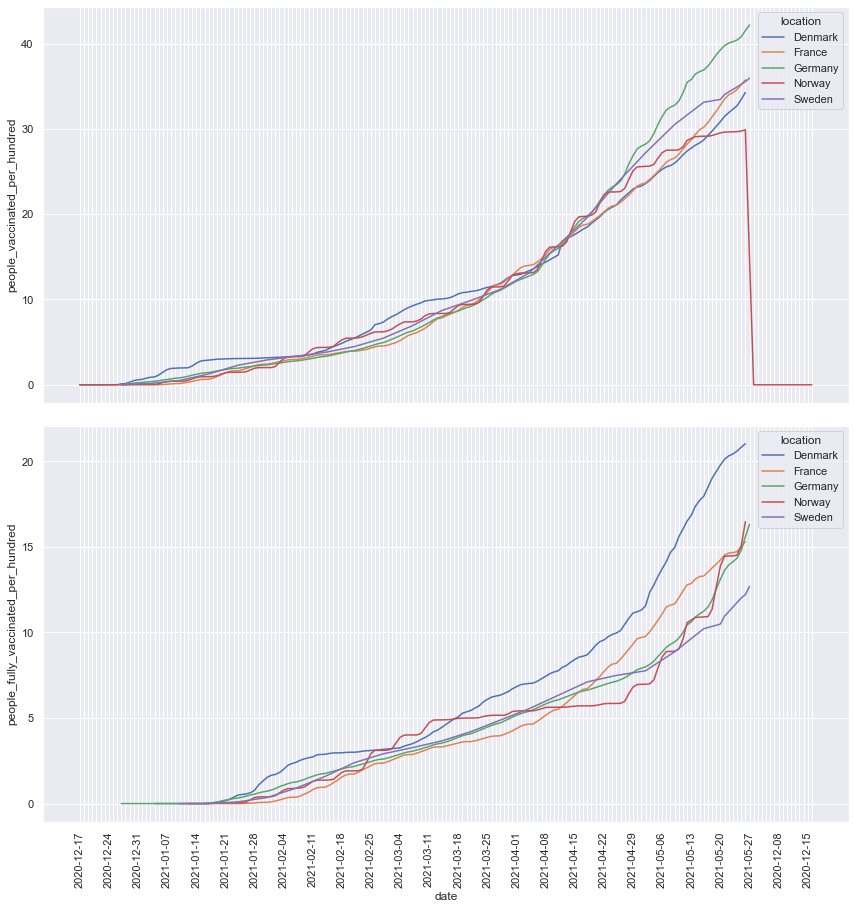

In [6]:
sns.set(rc={'figure.figsize':(12, 12)})
fig, ax = plt.subplots(2, 1, sharex=True)
fig.tight_layout()

plt.xticks(rotation=90)

g1 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_vaccinated_per_hundred", hue="location", ax=ax[0])

g2 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_fully_vaccinated_per_hundred", hue="location", ax=ax[1])

[l.set_visible(False) for (i,l) in enumerate(fig.gca().xaxis.get_ticklabels()) if i % 7 != 0];



## 14-days case rate per 100.000 inhabitants (from 2020)

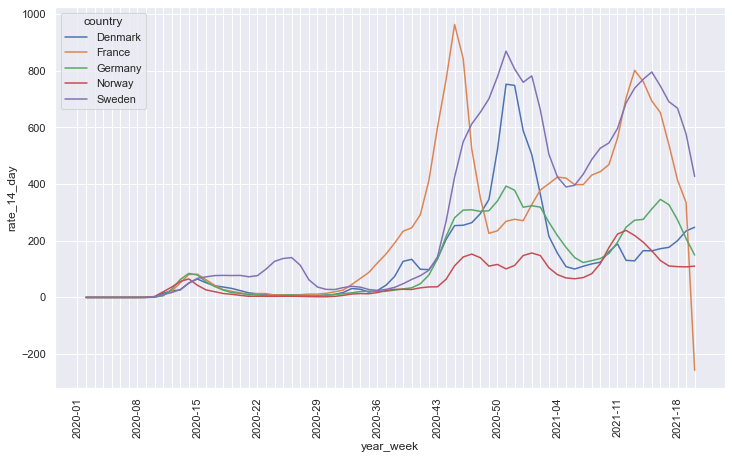

In [7]:
sns.set(rc={'figure.figsize':(12, 7)})
plt.xticks(rotation=90)

g = sns.lineplot(data=df_inf[df_inf['country'].isin(country_list)], x="year_week", y="rate_14_day", hue="country")

[l.set_visible(False) for (i,l) in enumerate(g.xaxis.get_ticklabels()) if i % 7 != 0];

## 14-days case rate per 100.000 inhabitants (from 2021)

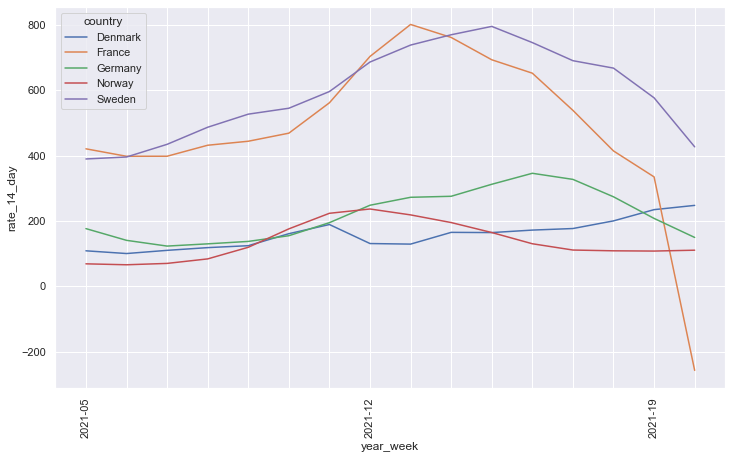

In [8]:
sns.set(rc={'figure.figsize':(12, 7)})
plt.xticks(rotation=90)

g = sns.lineplot(data=df_inf2[df_inf2['country'].isin(country_list)], x="year_week", y="rate_14_day", hue="country", ci=None)

[l.set_visible(False) for (i,l) in enumerate(g.xaxis.get_ticklabels()) if i % 7 != 0];

# Format of data

## Vaccination data

In [9]:
df[df['location']=='Germany']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
7470,Germany,DEU,2020-12-27,24100.0,24086.0,14.0,NaN,NaN,0.03,0.03,0.00,NaN
7471,Germany,DEU,2020-12-28,42658.0,42606.0,52.0,18558.0,18558.0,0.05,0.05,0.00,221.0
7472,Germany,DEU,2020-12-29,93513.0,92740.0,773.0,50855.0,34706.0,0.11,0.11,0.00,414.0
7473,Germany,DEU,2020-12-30,156539.0,155644.0,895.0,63026.0,44146.0,0.19,0.19,0.00,527.0
7474,Germany,DEU,2020-12-31,206744.0,205700.0,1044.0,50205.0,45661.0,0.25,0.25,0.00,545.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7617,Germany,DEU,2021-05-23,45278312.0,33700897.0,11835481.0,285347.0,720718.0,54.04,40.22,14.13,8602.0
7618,Germany,DEU,2021-05-24,45601490.0,33858973.0,12015325.0,323178.0,688328.0,54.43,40.41,14.34,8216.0
7619,Germany,DEU,2021-05-25,46245519.0,34176255.0,12388190.0,644029.0,655920.0,55.20,40.79,14.79,7829.0
7620,Germany,DEU,2021-05-26,47391752.0,34789848.0,13073808.0,1146233.0,663511.0,56.56,41.52,15.60,7919.0


## 14-day cases

In [10]:
df_inf[df_inf["country"]=="Germany"]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
10454,Germany,DEU,Europe,83166711.0,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
10455,Germany,DEU,Europe,83166711.0,cases,0,2020-02,0.000000,0,"Epidemic intelligence, national weekly data"
10456,Germany,DEU,Europe,83166711.0,cases,0,2020-03,0.000000,0,"Epidemic intelligence, national weekly data"
10457,Germany,DEU,Europe,83166711.0,cases,0,2020-04,0.000000,0,"Epidemic intelligence, national weekly data"
10458,Germany,DEU,Europe,83166711.0,cases,9,2020-05,0.010822,9,"Epidemic intelligence, national weekly data"
...,...,...,...,...,...,...,...,...,...,...
10522,Germany,DEU,Europe,83166711.0,cases,145626,2021-16,346.066349,3299325,"Epidemic intelligence, national weekly data"
10523,Germany,DEU,Europe,83166711.0,cases,126657,2021-17,327.394214,3425982,"Epidemic intelligence, national weekly data"
10524,Germany,DEU,Europe,83166711.0,cases,101269,2021-18,274.059173,3527251,"Epidemic intelligence, national weekly data"
10525,Germany,DEU,Europe,83166711.0,cases,71595,2021-19,207.852394,3598846,"Epidemic intelligence, national weekly data"
